In [130]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fft2, ifft2
from io import BytesIO

True


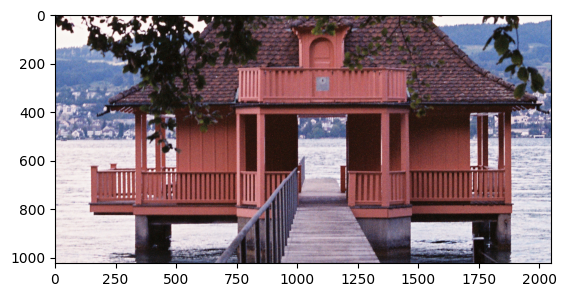

In [132]:
with open('resources/img.shape', "rb") as f:
    shape = int.from_bytes(f.read(4), 'little'), int.from_bytes(f.read(4), 'little')

img_r = np.fromfile('resources/img_r.mat', dtype=np.uint8).reshape(shape)
img_g = np.fromfile('resources/img_g.mat', dtype=np.uint8).reshape(shape)
img_b = np.fromfile('resources/img_b.mat', dtype=np.uint8).reshape(shape)

print(np.any(img_r!=img_g))

img = np.array([img_b, img_g, img_r]).transpose((1, 2, 0))

plt.imshow(img)
plt.show()

In [157]:
rows, cols = shape
fft_r = np.fromfile('output/fft_r.mat', dtype=np.float32).reshape(shape)
fft_g = np.fromfile('output/fft_g.mat', dtype=np.float32).reshape(shape)
fft_b = np.fromfile('output/fft_b.mat', dtype=np.float32).reshape(shape)

expected_fft_r = fft2(img_r)
expected_fft_g = fft2(img_g)
expected_fft_b = fft2(img_b)

print(np.real(expected_fft_r)[:rows//2+1, :cols//2+1])
print()
print(fft_r[:rows//2+1, :cols//2+1])
print()

[[ 2.28700858e+08  3.94017319e+07  4.27827432e+07 ...  7.53050944e+03
  -6.04332248e+03  1.18512000e+05]
 [ 1.30148985e+07  4.52679566e+06 -5.30562742e+06 ... -8.13888805e+02
  -4.14867436e+03  1.78123273e+03]
 [ 6.88339091e+06  1.01816605e+07 -5.54800269e+03 ... -4.90917529e+03
  -6.31948668e+03 -1.23534750e+04]
 ...
 [-1.73737666e+04  2.68453960e+04 -2.86529105e+04 ... -1.36829860e+03
  -3.05006799e+03  2.75257873e+03]
 [-1.81422425e+04  2.06381781e+04 -2.78371239e+04 ... -1.85663487e+01
  -6.80437761e+02  3.60543347e+02]
 [-1.36500000e+04  1.71249116e+04 -3.45699317e+04 ... -6.16895463e+02
  -1.06317794e+03 -5.00000000e+02]]

[[ 2.2870085e+08  3.9401732e+07  4.2782744e+07 ...  7.5307104e+03
  -6.0433169e+03  1.1851200e+05]
 [ 1.3014898e+07  4.5267955e+06 -5.3056265e+06 ... -8.1391095e+02
  -4.1486880e+03  1.7810000e+03]
 [ 6.8833910e+06  1.0181660e+07 -5.5480781e+03 ... -4.9092417e+03
  -6.3195151e+03 -1.2353500e+04]
 ...
 [-1.7373898e+04  2.6844852e+04 -2.8652771e+04 ... -1.3682439